<a href="https://colab.research.google.com/github/jungmin628/SummerWorkshop/blob/master/W1__20225224_%EC%9D%B4%EC%A0%95%EB%AF%BC_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1주차 과제는 좀 쉽게 내드리겠습니다. 제가 앓아누운 탓도 있고, 강의를 지나치게 빠른 페이스로 진행한 것도 무시 못하지 않을까 생각이 됩니다.  
강의가 어려우셨던 분들은 이 과제를 통해서 복습한다는 느낌으로 만져보시면 좋을 것 같습니다.  
팀교육 때 많은 분들이 다양한 이유로 제출이 늦었습니다. 정시 제출 부탁드리겠습니다.  
**7월 14일 오전 12:00시까지 받겠습니다.**

## 0. 아나콘다 - 텐서플로우 (및 필요한 패키지들) 설치하기

***주의: 구글 콜랩 사용 시 그냥 import만 하면 됩니다!***

팀교육의 기억을 되짚어 봅시다. 원하는 아나콘다 가상환경을 `activate` 후, 패키지를 `install`해주면 됩니다.  
```
conda activate venv-name
conda install package-name
```  
주의: 몇몇 패키지는 채널을 `conda-forge`로 설정해줄 필요가 있습니다. 이에 해당하는 parameter는 `--channel`, 혹은 `-c`입니다. 어떤 패키지가 콘다포지를 사용하는지는 documentation에 나와있습니다.  
```
conda install -c conda-forge package-name
```
물론 `pip`을 사용하는 게 편할 수도 있습니다. 저도 `pip`을 사용하는 게 편할 것 같은데, 가상환경 관리하려면 그래도 `conda install` 쓰는 게 좋을 것 같네요.

이번에 쓸 라이브러리들은 `tensorflow`, `numpy`, `matplotlib`입니다.  

+) Jupyter Notebook/JupyterLab 사용자의 경우, 이거 하나 깔겠다고 노트북 끄고 주피터 서버 끄고 깔았다가 다시 켜야 할 생각에 귀찮음이 폭풍같이 몰려올 수도 있겠습니다. 굳이 끌 필요 없이, 런처에서 터미널 켜서 거기서 커맨드 실행해도 현재 가상환경에서 실행하는 아나콘다 프롬프트랑 같은 효과를 볼 수 있을 겁니다. 근데 저는 그냥 실행하기 전에 다 깔고 들어가서 잘은 모르겠네요.

***주의:*** `conda install`로 텐서플로우를 설치할 경우, 환경에 따라 `tensorflow.keras`에 접근하려고 하면 `ModuleNotFoundError`를 뱉는 경우가 있습니다. 제가 그랬습니다. 이 경우, 그냥 `keras`도 따로 설치해주세요. 원래는 텐서플로우만 깔면 케라스도 같이 딸려오는 게 맞을 건데 왜 저한테 이런 짓을 하는지는 잘 모르겠습니다.  
또한, 아나콘다와 JupyterLab을 굳이 설치해서 사용하시는 분들은 웬만큼 하는 GPU를 갖고 계시리라 생각이 됩니다. 이 경우, `tensorflow-gpu` 역시 설치해주셔야 합니다. 이것도 분명 텐서플로우 깔 때 같이 깔려야 하는데 저는 왜 안 깔려있는지 모르겠네요.

GPU 사용 확인은 다음 코드로 할 수 있습니다.
```Python
if tf.test.gpu_device_name(): 
    print(f'Default GPU Device:{tf.test.gpu_device_name()}')
else:
    print("tensorflow-gpu not installed")
```  

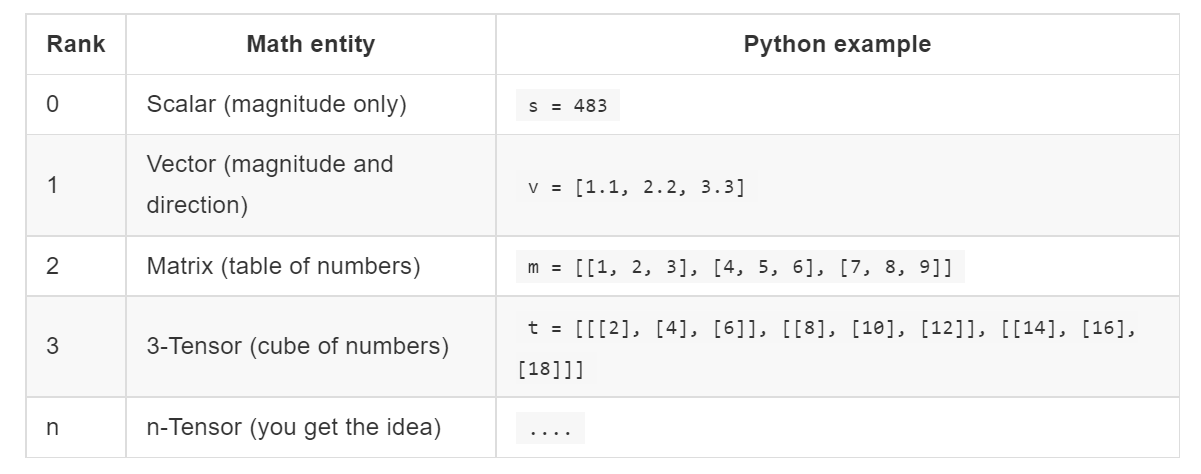

In [1]:
# 그리고 import 역시 잊으면 안되겠죠.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



```
import tensorflow.compat.v1 as tfc
tfc.disable_v2_behavior()
a = tfc.Variable(5)
b = tfc.Variable(4)
c = tfc.multiply(a,b)
print(c) #문자열이 출력되는 이유는 텐스플로우에서 데이터의 처리 단위는 텐서이기 때문이다.
# 이것은 일종의 다차원 배열의 객체라고 이해할 수 있다.
init = tfc.global_variables_initializer()
#텐서플로의 연산은 데이터 플로우 그래프로 구성하는데, 텐서플로우에서 변수형은
#그래프를 실행하기 전에 초기화를 해줘야 그 값을 변수에 지정이 된다.
#즉, 위와 같은 초기화를 하지 않는 다면 a,b,c 값이 지정되어있지 않다는 말이다.
sess = tfc.Session()
#텐서플로우의 수식은 일종의 흐름을 가진다는 아이디어에서 착안한 것이다.
#즉, 우리가 tf.constatnt() 및 tf.add() 를 이용해서 수행한 명령어는 그래프를 
#정의한 것이지 실제로 연산을 수행한 것이 아니다. 연산을 수행하기 위해서는 a와 b
#에 데이터를 넣어 흐름이 이루어지도록 만들어야합니다. 이 동작을 Session이라고 한다.
sess.run(init)
sess.run(c)
```

## 1. TensorFlow란?  
텐서플로우는 문자 그대로 텐서의 플로우를, 혹은 텐서가 어떻게 움직이는지, 제어할 수 있도록 해 주는 라이브러리입니다. "텐서"가 무엇이냐? 우리는 이미 두 가지의 텐서를 알고 있습니다. 스칼라와 벡터가 그것입니다. 우리는 어떠한 양을 특정한 좌표계에서 정의하고, 그 좌표계에서 다루는 것에 익숙해져 있습니다(스칼라와 벡터). 하지만 당장 좌표를 기술하는 방법이 한 가지가 아니기에, 때로 이것은 좀 머리가 아플 때가 있습니다. 따라서 좌표에 무관하게 양을 일정하게 기술할 수 있도록 만들어진 것이 텐서입니다.  
말이 어렵고 길어졌습니만, 그냥 "텐서 = n차원 행렬"이라고 생각해도 무방합니다(적어도 머신러닝에서는요). 실제로 그렇게 다룰 거고요. 텐서의 `shape`는 몇 차원인지, 각 차원의 크기는 얼마인지를 나타냅니다. 텐서의 `rank`는 이 텐서가 총 몇 차원인지를 나타냅니다.

이제 텐서를 만들어봅시다. 0D, 1D, 2D 텐서를 만들어보도록 합니다. 각각 우리가 아는 스칼라, 벡터, 행렬이라고 보시면 됩니다.

In [2]:
number = tf.constant(3.1415926535, tf.float64)
string = tf.constant('DeepLearning', tf.string)

print(f'number: {tf.rank(number)}D tensor')
print(f'string: {tf.rank(string)}D tensor')

number: 0D tensor
string: 0D tensor


보시다시피, 우리가 다루는 텐서는 하나의 자료구조이기 때문에, 수학의 벡터나 행렬처럼 안에 숫자만 들어갈 필요는 없습니다.

In [3]:
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)
strings = tf.constant(['Deep', 'learning'], tf.string)

print(f"`numbers` is a {tf.rank(numbers)}D Tensor with shape: {tf.shape(numbers)}")
print(f"`strings` is a {tf.rank(strings)}D Tensor with shape: {tf.shape(strings)}")

`numbers` is a 1D Tensor with shape: [3]
`strings` is a 1D Tensor with shape: [2]


그리고 대망의 2D(를 포함한 고차원) 텐서입니다. 말씀드렸듯이, 그냥 "n차원 행렬을 간지나게 말하는 방법"이라고 생각하시면 됩니다.  
이후 배울 CNN, 그리고 컴퓨터 비전을 다루는 쪽에서는 4D 텐서(batch, 높이, 너비, 채널)를 가지고 놀게 됩니다.

In [4]:
'''TODO: 2D 텐서 정의하기'''
matrix = tf.constant([[1.0, 2.0, 3.0, 4.0], [5.0, 6.0, 7.0, 8.0]])

assert isinstance(matrix, tf.Tensor), "matrix is not tf.Tensor object"
assert tf.rank(matrix) == 2

# 함수나 클래스를 구성할 때, 객체 타입에 알맞는지 조건문을 검사할 때 주로 사용

*파이썬 내장함수 중 주어진 인스턴스가 어떤 클래스 또는 데이터 타입인지 확인하는 함수가 있다. isinstance 에 객체 이름과 클래스 또는 데이터 타입이 일치하는 경우에는 True 아니면 False를 출력해준다.*

In [5]:
'''TODO: 4D 텐서 정의하기'''
# tf.zeros 함수를 사용, 값이 0으로 초기화된 10 x 256 x 256 x 3 4D 텐서를 정의해봅시다.
# 이것은 256 x 256 RGB 이미지 열 장이라고 생각할 수도 있습니다.
images = tf.zeros((10,256,256,3))
print(tf.rank(images))
assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
# Tensor는 a single data type(float32, int32 or string ...) 이다.  
assert tf.rank(images) == 4, "matrix must be of rank 4"
# 4D가 아닐 경우에 오류메세지가 뜨는 것임.
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

tf.Tensor(4, shape=(), dtype=int32)


또한, numpy에서도 그랬듯이, 텐서도 슬라이싱을 지원합니다.

In [6]:
# 2D 텐서로 2 x 3보다 큰 것을 정의했음을 가정하고 있습니다.
#matrix = tf.constant([[1.0, 2.0, 3.0, 4.0], [5.0, 6.0, 7.0, 8.0]])
row_vector = matrix[1] # 1번째행 출력
col_vector = matrix[:,2] #3번째 열에 있는 숫자를 출력
scalar = matrix[1, 2]

print(f"row_vector: {row_vector}")
print(f"col_vector: {col_vector}")
print(f"scalar: {scalar}")

row_vector: [5. 6. 7. 8.]
col_vector: [3. 7.]
scalar: 7.0


## 2. 텐서의 계산  
1주차 강의에서는 퍼셉트론과 DNN에 대해 이야기했습니다. 여기서 우리는 여러 개의 텐서 계산을 이어붙이는 느낌의 작업을 해야 할 필요가 있습니다. 이러한 연산은 그래프 형태로 이어져 있다고 생각하면 조금 이해하기 쉽습니다.

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/add-graph.png)

In [7]:
# 각 노드에 해당하는 스칼라입니다. 이는 c 노드를 구성하는 스칼라들이 되겠습니다.
a = tf.constant(15)
b = tf.constant(61)

c1 = tf.add(a,b)
c2 = a + b # 텐서플로우는 '+' 연산이 텐서에도 적용되도록 오버라이드합니다.
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


텐서플로우는 이러한 식으로 "연산의 그래프"를 실행하는 것으로 볼 수 있겠습니다. 조금 더 복잡한 예시를 봅시다.

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/computation-graph.png)

`a`, `b`로부터 출력 `e`를 계산합니다. 이 과정에서 중간단계 `c`, `d`를 계산하고 있습니다. 각 노드는 특정한 연산을 실행하고, 그 결과를 다음 노드에 넘겨주고 있습니다.  
이러한 방식으로 동작하는 함수를 하나 정의해봅시다.

In [28]:
def func(a, b):
    '''TODO: c, d, e에 대해 연산 정의하기 (tf.add, tf.subtract, tf.multiply 함수 사용)'''
    c = tf.add(a,b)
    d = tf.subtract(b,1)
    e = tf.multiply(c,d)
    return e
func(1,2)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

그리고, `a, b`에 대해 시험해보도록 합시다.

In [9]:
a, b = 1.5, 2.5
e_out = func(a,b)
print(e_out)

6.0


## 3. 텐서플로우와 신경망

그러면 텐서플로우와 [Keras API](https://www.tensorflow.org/guide/keras)로 신경망을 만들어보도록 합시다. Keras API는 딥 러닝을 위해 만들어진 강력하고 직관적인 프레임워크입니다. 자세한 건 링크로 걸어둔 공식문서 읽어보세요.

우선은 dense layer 하나부터 시작합시다. 수업시간에 배운 것을 활용합시다.
$$y = \sigma(W x + b)$$

여기서 $W$는 가중치 행렬 // $b$는 bias // $x$는 입력 // $\sigma(z)$는 시그모이드 활성화 함수가 되겠습니다. 이것을 시각화하자면 다음과 같이 되겠죠.

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/computation-graph-2.png)

이러한 텐서들은 `Layer`라는 [추상 데이터 타입](https://en.wikipedia.org/wiki/Abstract_data_type) 통해 "흘러갑니다(flow)". 추상 데이터 타입이 뭔지 굳이 알아야 할 필요는 없습니다만 알면 조금 깊게 이해할 수 있겠습니다. 이 `Layer`는 신경망에서 흔히 이루어지는 연산들을 구현하며, 가중치를 갱신하거나, loss를 계산하거나, 계층 간의 연결을 정의하는 데 사용됩니다. 우선 `Layer`를 사용해 위의 퍼셉트론을 하나 만들어줍시다.

In [10]:
## n_output_nodes: 출력 노드의 개수
# input_shape: 입력 shape
# x: 입력


class OurDenseLayer(tf.keras.layers.Layer):
    # 수업시간에 말씀드렸지만, 그냥 컨스트럭터라고 보시면 됩니다.
    # 정확히는 좀 다르지만, 지금 깊게 설명드릴 이유는 없을 것 같습니다.
    def __init__(self, n_output_nodes):
        super(OurDenseLayer, self).__init__()
        # 
        self.n_output_nodes = n_output_nodes
    # 

    def build(self, input_shape):
        d = int(input_shape[-1])
        # 가중치 행렬 W와 bias b를 정의 및 초기화
        # 초기화는 물론 랜덤으로 됨
        self.W = self.add_weight("weight", shape=[d, self.n_output_nodes])
        self.b = self.add_weight("bias", shape=[1, self.n_output_nodes])

    def call(self, x):
        '''TODO: z 정의'''
        z = tf.matmul(x,self.W)+self.b
        #self.W는 행렬의 곱이므로 matmul을 해야한다...
        '''TODO: 출력 정의(z의 시그모이드)(tf.sigmoid)'''
        y = tf.sigmoid(z)
        return y

# 가중치는 랜덤으로 초기화되기 때문에, 여기서는 시드를 설정하도록 함
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# [[0.26978594 0.45750415 0.66536945]]가 나오면 성공입니다.
print(y.numpy())

[[0.26978594 0.45750415 0.66536945]]





---


```
__init__ 와 self
```
파이썬에서 특별하게 약속된 메서드 가운데 하나로, 초기화 메서드라고 한다.

self는 인스턴스 자기 자신을 의미한다. 우리는 인스턴스가 생성될 때 self.hello = '안녕하세요.' 처럼 자기 자신에 속성을 추가했다. 여기서 __init__ 의 매개변수 self에 들어가는 값은 Person()이라 할 수 있다. 그리고 self가 완성된 뒤 james 에 할당된다. 이후 메서드를 호출하면 현재 인스턴스가 자동으로 매개변수 self에 들어온다 그래서 greeting 메서드에서 print(self.hello) 처럼 속성을 출력할 수 있었던 것이다.


```
class Person:
  def __init__(self):
    self.hello = '안녕하세요.'
  def greeting(self):
    print(self.hello)
james = Person()
james.greeting() # 안녕하세요. 출력됨
```


---




물론 텐서플로우는 이 [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) 레이어를 포함한 각종 흔히 쓰이는 레이어들을 이미 가지고 있으니, 매번 이렇게 모든 걸 만들어낼 필요는 없습니다. 모듈에 접근하는 것만 해도 귀찮아보이네요.  
이제 케라스의 [`Sequential`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Sequential) 모델과 `Dense` 레이어 하나를 사용해서 네트워크를 구성해봅시다. `Sequential`을 사용하면 이렇게 레이어를 그냥 하나하나 쌓아올려서 신경망을 구성할 수 있습니다.

In [25]:
### Sequential API를 사용하여 신경망 구성하기 ###

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3

# 모델 정의
model = Sequential()

'''TODO: Dense 레이어를 정의'''
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = tf.keras.layers.Dense(units = n_output_nodes)

# 완성된 Dense 레이어를 모델에 추가
model.add(dense_layer)


In [12]:
x_input = tf.constant([[1,2.]], shape=(1,2))

'''입력에 대한 모델의 예상 확인'''
model_output = dense_layer
print(model_output)

이제 여기에 약간의 커스터마이징을 더해주고 싶다면, [`Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model?version=stable) 클래스에 바로 서브클래스를 정의해줄 수 있습니다(서브클래스는 그냥 클래스 안에 클래스를 하나 더 정의한다고 생각하면 편합니다). `Model` 클래스는 우리가 모델, 혹은 하나의 신경망이라고 하는 것들을 표현합니다. 이 클래스에 서브클래스를 더한다는 것은, 우리의 모델을 표현하는 클래스를 정의한다는 뜻으로 이해하면 되겠습니다. 이렇게 만들어진 `Model` 서브클래스에서 우리는 원하는 대로 레이어, 학습 과정, 활성화 함수, 모델 따위를 주무를 수 있습니다. 이제 서브클래스를 사용해서 위의 모델을 한 번 만들어봅시다.

In [17]:
### 서브클래스로 모델 구현하기 ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

    # __init__에는 우리가 만들 모델의 레이어를 정의합니다.
    def __init__(self, n_output_nodes):
        super(SubclassModel, self).__init__()
        '''TODO: 우리는 Dense 하나짜리 모델을 만들 예정입니다. Dense를 정의해주시면 되겠습니다.''' 
        self.dense_layer = dense_layer
    # call 메서드에서는 순전파(가중치와 곱하고 활성화함수에 들어가는 과정을 순전파라고 합니다)를 정의합니다.
    def call(self, inputs):
        return self.dense_layer(inputs)

이제 만들어진 `SubclassModel`을 시험해봅시다.

In [18]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[ 0.24415088  0.6485772  -1.9461871 ]], shape=(1, 3), dtype=float32)


말했듯이, `Model` 서브클래스는 모델을 직접 만지고 싶을 때 강력한 기능입니다. 예를 들어서 우리가 원할 때 input을 그대로 출력하는 identity(항등) model을 만들고 싶다고 합시다. 우리는 이것을 구현하기 위해서 `call` 메서드에 `isidentity` boolean argument를 추가해주도록 하겠습니다.

In [20]:
### 서브클래스 모델 커스터마이징하기 ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

    def __init__(self, n_output_nodes):
        super(IdentityModel, self).__init__()
        self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

    '''TODO: isidentity 플래그에 따라서 input을 그대로 출력하는 기능 구현.'''
    def call(self, inputs, isidentity=False):
        x = self.dense_layer(inputs)
        isidentity = tf.identity(x)
        '''TODO: identity 구현하기'''

In [22]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: 그냥 call하고, identity 플래그를 세우고 call해보기.'''
out_activate = 
out_identity = isidentity

print(f"Network output with activation: {out_activate}; network identity output: {out_identity}")

Network output with activation: ; network identity output: [[1. 2.]]


이 정도 하면 모델 구성은 충분히 본 것 같습니다. 이제 역전파를 구현하고, 실제로 신경망을 학습시키는 부분에 집중합시다.

## 4. 텐서플로우와 [Automatic Differentation](https://www.tensorflow.org/guide/autodiff)  

텐서플로우가 제공하는 [Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation)은 우리가 구현하고 싶은 학습의 가장 중요한 부분입니다. 우리는 역전파에 있어 기울기를 계산하기 위해 텐서플로우의 [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape?version=stable)를 사용할 것입니다.

![alt_text](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Compactcassette.jpg/640px-Compactcassette.jpg)

신경망에서 순전파가 일어날 때, 행해진 모든 연산이 "테이프"에 기록이 됩니다. 그리고 기울기를 계산할 때, 연산이 기록된 테이프는 그대로 역재생됩니다. 기본적으로 역재생을 완료한 테이프는 버려집니다. 즉, 하나의 `tf.GradientTape`는 기울기를 한 번만 계산할 수 있다는 뜻입니다. 물론 굳이 버릴 필요는 없습니다. 이 경우 `persistent`한 기울기 테이프를 만들어주면 됩니다.

우선, GradientTape로 어떻게 기울기 계산이 구현되는지, 또한 어떻게 결과에 접근하는지 봅시다. 이를 위해 $y = x^2$ 정도의 간단한 함수를 하나 정의합시다.

In [26]:
x = tf.Variable(3.0)

# Gradient tape 시작
with tf.GradientTape() as tape:
    # 함수 정의
    y = x * x
# 계산된 기울기 가져오기: "y를 x에 대해서 미분한 것"
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

이번에는 이 테이프를 신경망이라는 맥락에서 바라보도록 합시다. 우리는 신경망 학습에 있어 미분과 Stochastic Gradient Descent를 사용해서 loss function을 최적화하게 됩니다. 이제 Auto diff와 SGD를 사용하여 $L = (x - x_f)^2$로 정의되는 loss function의 최소값을 찾아보도록 합시다. $x_f$는 target value, 즉 우리가 최적화하고 싶은 값이 되겠습니다. 물론 한 눈에 봐도 $x_{min} = x_f$라는 사실이 자명하긴 합니다만 그래도 `GradientTape`를 한번 사용해봅시다.

Initializing x=<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.6940167]], dtype=float32)>


Text(0, 0.5, 'x value')

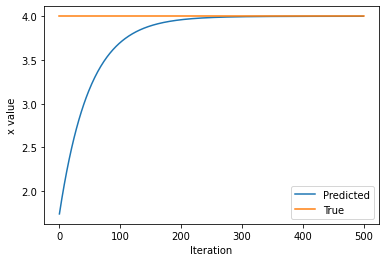

In [27]:
### autodiff와 SGD를 통한 함수 최소화 ###

# x 초기화: 랜덤값 주기
x = tf.Variable([tf.random.normal([1])])
print(f"Initializing x={x}")

learning_rate = 1e-2 # 학습률 정의
history = [] # 결과를 저장할 리스트
# target value 지정
x_f = 4

# 총 500번 동안 SGD를 돌릴 겁니다. 
# 지나치게 느리다면 CPU를 사용 중은 아닌지 확인해보세요.
# 한 번 돌릴 때마다 loss를 계산하고, loss의 미분을 계산해서, x가 갱신이 됩니다.
for i in range(500):
    with tf.GradientTape() as tape:
        '''TODO: Loss 정의하기.'''
        loss = (x-x_f)**2

    # gradient tape를 사용한 loss 최소화
    grad = tape.gradient(loss, x)
    new_x = x - learning_rate*grad
    x.assign(new_x) # x 갱신
    history.append(x.numpy()[0])

# 500번의 iteration 동안 x의 변화를 관찰할 수 있는 그래프 생성.
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')